In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
from pydataset import data

import warnings
warnings.filterwarnings('ignore')

### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips_df = sns.load_dataset('tips')

In [3]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

 *assuming X and y are already defined*
 
model = LinearRegression().fit(X, y)

predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the tips dataset.

In [4]:
baseline = tips_df.tip.mean()

In [5]:
#baseline is mean of dependent variable
tips_df['baseline'] = baseline
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


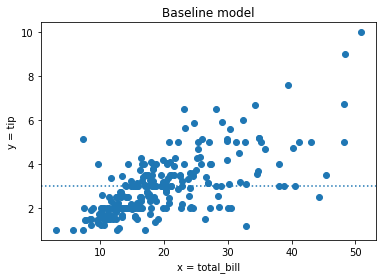

In [6]:
# plot data with baseline:

plt.scatter(tips_df.total_bill, tips_df.tip)
plt.axhline(tips_df.tip.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('Baseline model');

In [7]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(tips_df[['total_bill']], tips_df.tip)

# make prediction
tips_df['yhat'] = lm.predict(tips_df[['total_bill']])

tips_df

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

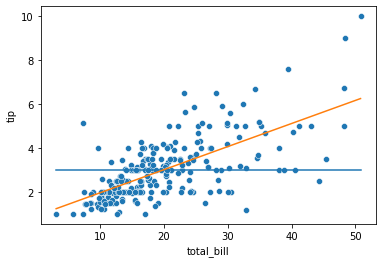

In [46]:
# visualize the line of best fit from OLS linear model
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips_df)
sns.lineplot(x = 'total_bill', y = 'baseline', data = tips_df)
sns.lineplot(x = 'total_bill', y = 'yhat', data = tips_df)

In [9]:
# residual = actual - predicted
tips_df['residual'] = tips_df.tip - tips_df.yhat
tips_df['baseline_residual'] = tips_df.tip - tips_df.baseline

In [10]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


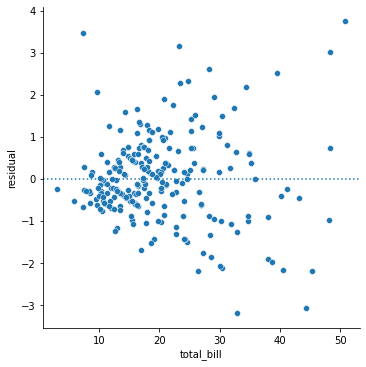

In [48]:
sns.relplot(x = 'total_bill', y = 'residual', data = tips_df)
plt.axhline(0, ls = ':')

In [11]:
# sum of residual is zero
tips_df.residual.sum()

9.769962616701378e-14

In [12]:
# sum of baseline_residual
tips_df.baseline_residual.sum()

-2.4868995751603507e-14

### 3. Plot the residuals for the linear regression model that you made.

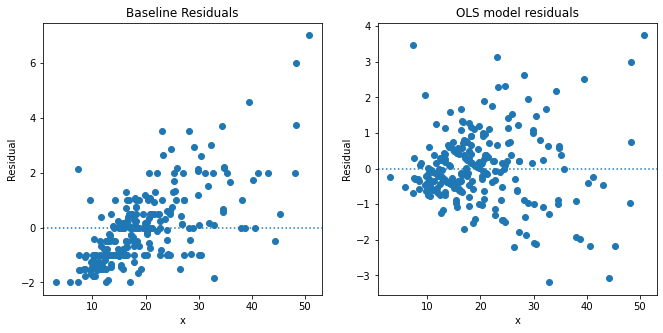

In [50]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(tips_df.total_bill, tips_df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(tips_df.total_bill, tips_df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [29]:
# first calculate the square of residuals

tips_df['residual^2'] = tips_df.residual**2
tips_df['baseline_residual^2'] = tips_df.baseline_residual**2

tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2,explained_variance
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252,-0.293643
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990,-0.992056
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724,0.128556
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170,0.408971
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203,0.504544


In [43]:
SSE = tips_df['residual^2'].sum()
print('SSE =', "{:.1f}".format(SSE))

SSE = 252.8


In [39]:
num_observations = len(tips_df)
num_observations

244

In [52]:
MSE = SSE/num_observations
print("MSE = ", "{:.3f}".format(MSE))

MSE =  1.036


In [51]:
RMSE = sqrt(MSE)
print("RMSE = ", "{:.3f}".format(RMSE))

RMSE =  1.018


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [40]:
SSE_baseline = tips_df['baseline_residual^2'].sum()
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE Baseline = 465.2


In [41]:
MSE_baseline = SSE_baseline/num_observations
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE baseline =  1.9


In [42]:
RMSE_baseline =  sqrt(MSE_baseline)
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE baseline =  1.4


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [14]:
def compare_SSE_model_vs_baseline():
    tips_df['residual^2'] = tips_df.residual**2
    tips_df['baseline_residual^2'] = tips_df.baseline_residual**2
    SSE_model = tips_df['residual^2'].sum()
    SSE_baseline = tips_df['baseline_residual^2'].sum()
    print('SSE of model =', "{:.1f}".format(SSE_model))
    print('SSE of baseline =', "{:.1f}".format(SSE_baseline))
    if SSE_model < SSE_baseline:
        print('Model SSE out performs Baseline SSE by:', "{:.1f}".format(SSE_baseline - SSE_model))
    else:
        print('You should produce a better model. Bye.')    

In [27]:
compare_SSE_model_vs_baseline()

SSE of model = 252.8
SSE of baseline = 465.2
Model SSE out performs Baseline SSE by: 212.4


### 7. What is the amount of variance explained in your model?

In [34]:
# To find the amount of variance explained you must subtract the baseline from the OLS model
ESS = ((tips_df.yhat - tips_df.baseline)**2).sum()

In [53]:
ESS

212.4237331984043

In [54]:
TSS = ESS + SSE

In [55]:
TSS

465.2124770491803

In [56]:
variance = ESS/TSS
variance

0.4566165863516764

In [18]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2,explained_variance
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252,-0.293643
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990,-0.992056
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724,0.128556
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170,0.408971
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203,0.504544


### 8. Create a file named evaluate.py that contains the following functions.

In [57]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [58]:
def residuals(actual, predicted):
    return actual - predicted
def sse(actual, predicted):
    return (residuals(actual, predicted)**2).sum()
def mse(actual, predcited):
    n = actual.shape[0]
    return sse(actual, predicted) / n
def rmse(actual, predicted):
    return math.sqrt(mse(actual, predcited))
def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()
def tss(actual):
    return ((actual -actual.cmean()) ** 2).sum()
def r2_score(actual,predicted):
    return ess(actual, predicted)/ tss(actual)

In [ ]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse':
        ''
    })



def better_than_baseline(actual, predcited):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual,predicted)
    return rmse_model < rmse_baseline

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at lal the regression evaluation metrics, and determine wheter this model is better than the baseline model. Use

In [68]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


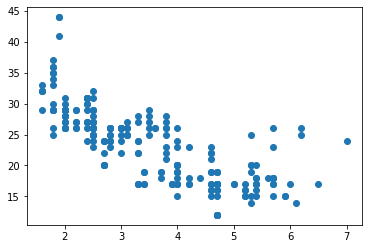

In [69]:
#plot displacement vs highway mps

plt.scatter(mpg.displ, mpg.hwy)

In [70]:
# plot displacement vs residuals

plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')
plt.ylabel('residuals')
plt.xlabel('displacement (liters)')

NameError: name 'predictions' is not defined

In [ ]:
mpg[mpg.displ > 5]

In [ ]:
# calculate regressions errors

evaluate.regression_errors(mpg.hwy, predictions)

In [ ]:
# is our model better than baseline?

evaluate.better_than_baseline(mpg.hwy, predictions)